DOC DU LIEU VA XU LI DU LIEU TRONG

In [1953]:
import pandas as pd

In [1954]:
df=pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [1955]:


df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

THEM GIA TRI NGAU NHIEN

In [1956]:
import numpy as np
# mode=df['Age'].mode() # ! 28.0
df['Age_random2']=df['Age'].fillna(float(np.random.randint(100)))

In [1957]:
df['Age_random2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age_random2
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


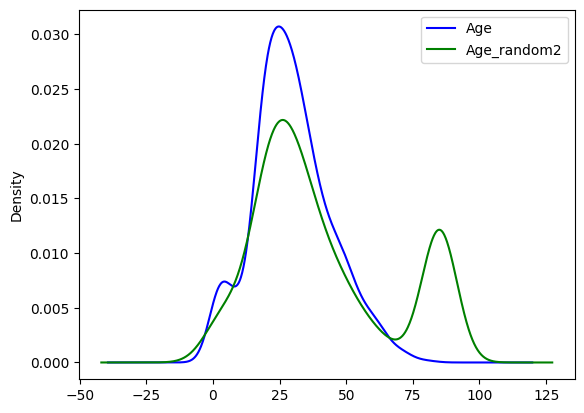

In [1958]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='blue')
df['Age_random2'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [1959]:
NORMAL_BASIC=[]
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_random2','Fare']].fillna(0),df['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    NORMAL_BASIC.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6455223880597015
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6529850746268657


In [1960]:
print(np.mean(NORMAL_BASIC))

0.6664179104477612


XU lI AGE_RANDOM GAUSSIN VA FARE SKEWED

In [1961]:

def gaussian(lst):
    
    uppper_boundary=lst.mean() + 3* lst.std()
    lower_boundary=lst.mean() - 3* lst.std()
    print(lower_boundary), print(uppper_boundary),print(lst.mean())
    lst.loc[lst>=uppper_boundary]=uppper_boundary
    return lst

In [1962]:
data=df.copy()

In [1963]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [1964]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

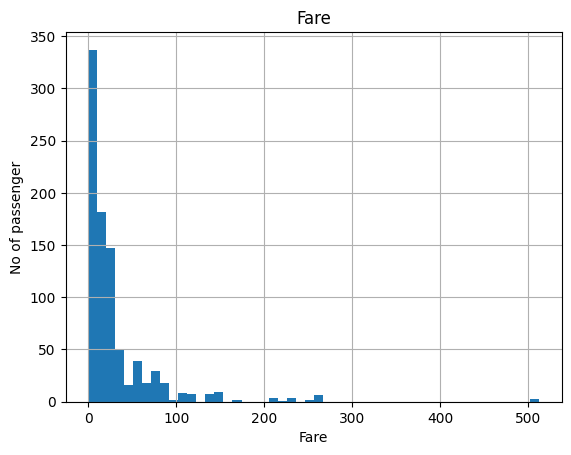

In [1965]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')


Text(0, 0.5, 'No of passenger')

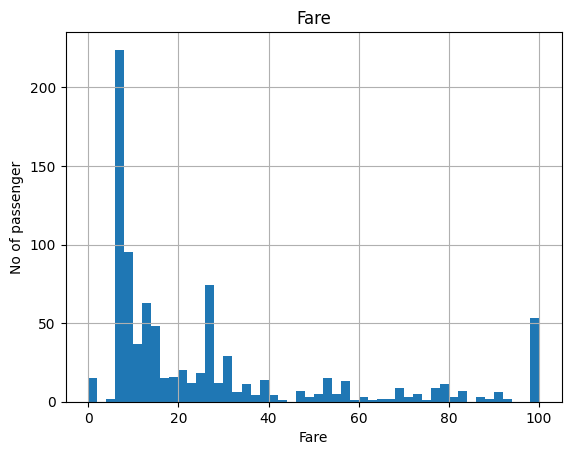

In [1966]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [1967]:
data['Age_random2']=gaussian(data['Age_random2'])

-36.17800761082836
117.54763724045799
40.684814814814814


C:\Users\ACER\AppData\Local\Temp\ipykernel_39696\2215347619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lst.loc[lst>=uppper_boundary]=uppper_boundary


Text(0, 0.5, 'No of passenger')

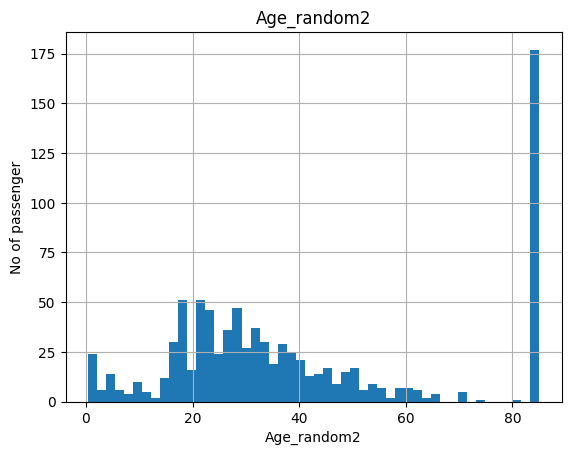

In [1968]:
figure=df.Age_random2.hist(bins=50)
figure.set_title('Age_random2')
figure.set_xlabel('Age_random2')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

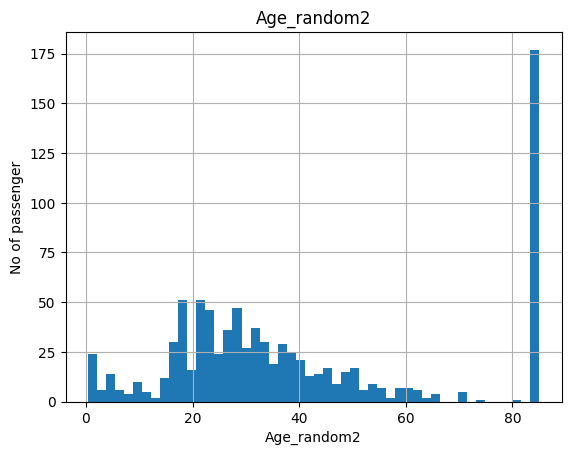

In [1969]:
figure=data.Age_random2.hist(bins=50)
figure.set_title('Age_random2')
figure.set_xlabel('Age_random2')
figure.set_ylabel('No of passenger')


Chinh xac cua du doan

In [1970]:
RANDOM2_FIX=[]

In [1971]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM2_FIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6417910447761194


DO LECH SAU KHI SU LI NGOAI LE

In [1972]:
print(np.mean(RANDOM2_FIX)-np.mean(NORMAL_BASIC))

-0.0003731343283581712


Chuan hoa theo standardscaler-scorez

In [1973]:
data.info()
data = data.drop('Age', axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   Fare         891 non-null    float64
 4   Age_random2  891 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 34.9 KB


In [1974]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Fare         891 non-null    float64
 3   Age_random2  891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [1975]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df_scaled = pd.DataFrame(Scaler.fit_transform(data),columns
=data.columns)
df_scaled

,Survived,Pclass,Fare,Age_random2
0,-0.789272,0.827377,-0.724935,-0.729689
1,1.266990,-1.566107,1.622214,-0.104849
2,1.266990,0.827377,-0.700193,-0.573479
3,1.266990,-1.566107,0.955703,-0.222006
4,-0.789272,0.827377,-0.695611,-0.222006
...,...,...,...,...
886,-0.789272,-0.369365,-0.514168,-0.534426
887,1.266990,-1.566107,0.108970,-0.846846
888,-0.789272,0.827377,-0.131122,1.730619
889,1.266990,-1.566107,0.108970,-0.573479


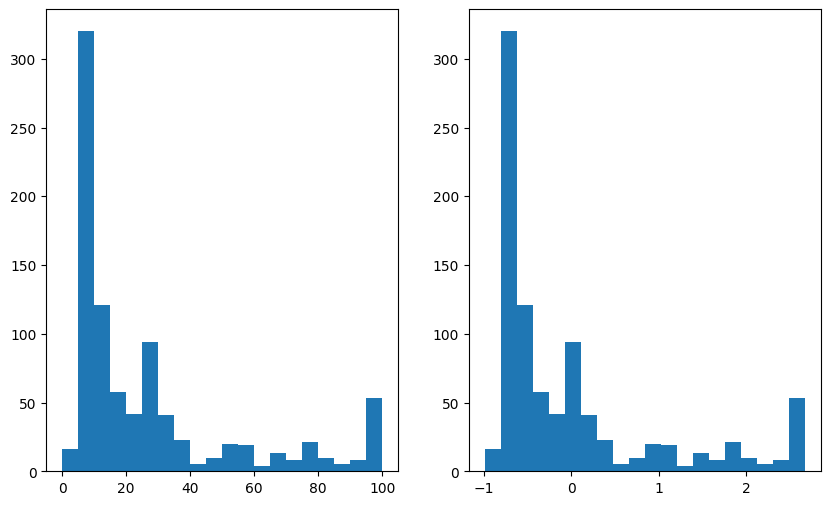

In [1976]:
import matplotlib.pyplot as plt
# plt.hist(data['Fare'],bins=20)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Fare'],bins=20)
plt.subplot(1,2,2)
plt.hist(df_scaled['Fare'],bins=20)
plt.show()


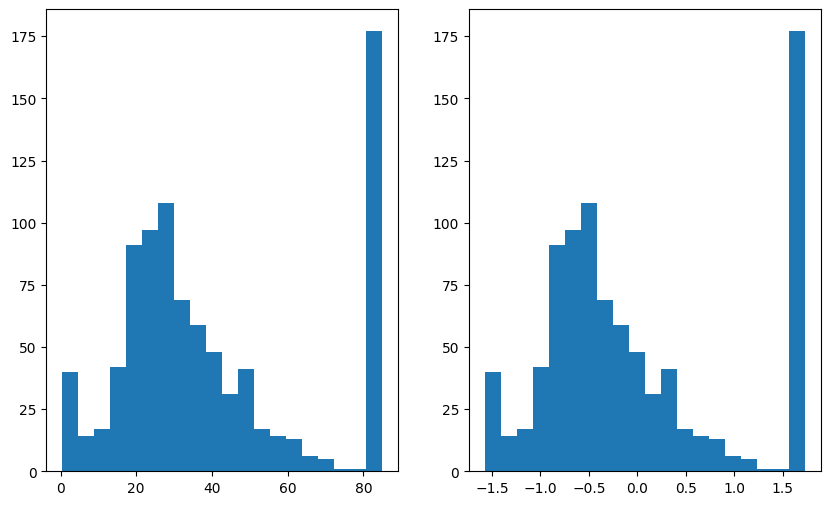

In [1977]:
# plt.hist(data['Age_random2'],bins=20)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Age_random2'],bins=20)
plt.subplot(1,2,2)
plt.hist(df_scaled['Age_random2'],bins=20)
plt.show()


Chuan hoa theo minmax

In [1978]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(data),columns
=data.columns)
df_minmax.head()

,Survived,Pclass,Fare,Age_random2
0,0.0,1.0,0.072500,0.255143
1,1.0,0.0,0.712833,0.444313
2,1.0,1.0,0.079250,0.302436
3,1.0,0.0,0.531000,0.408844
4,0.0,1.0,0.080500,0.408844


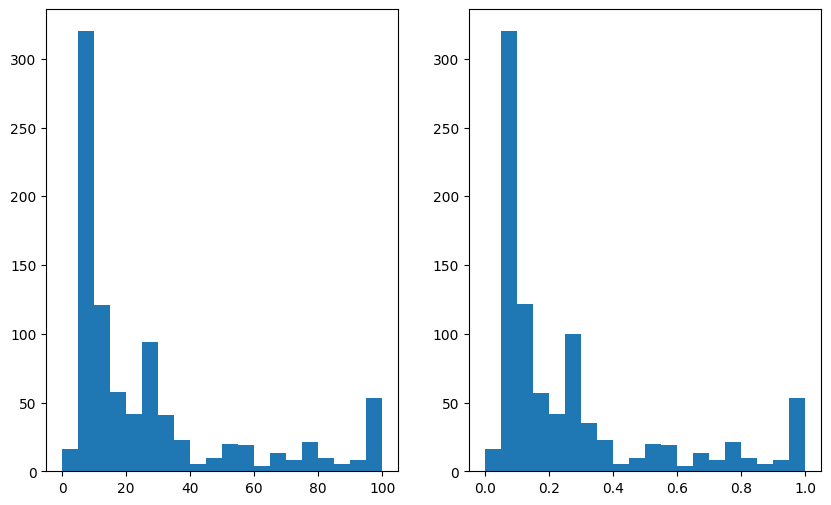

In [1979]:
# plt.hist(data['Fare'],bins=20)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Fare'],bins=20)
plt.subplot(1,2,2)
plt.hist(df_minmax['Fare'],bins=20)
plt.show()


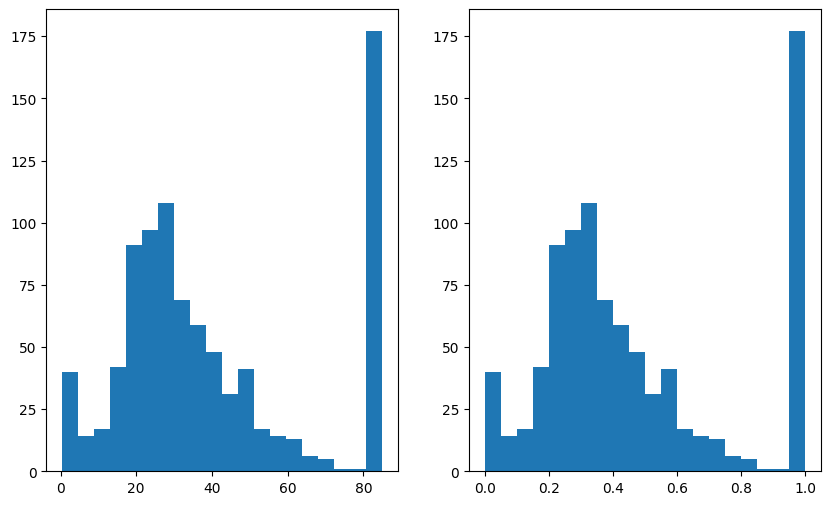

In [1980]:
# plt.hist(data['Age_random2'],bins=20)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Age_random2'],bins=20)
plt.subplot(1,2,2)
plt.hist(df_minmax['Age_random2'],bins=20)
plt.show()

Chuan hoa voi ngoai le

In [1981]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(data),columns
=data.columns)
df_robust_scaler.head()

,Survived,Pclass,Fare,Age_random2
0,0.0,0.0,-0.312011,-0.31250
1,1.0,-2.0,2.461242,0.18750
2,1.0,0.0,-0.282777,-0.18750
3,1.0,-2.0,1.673732,0.09375
4,0.0,0.0,-0.277363,0.09375


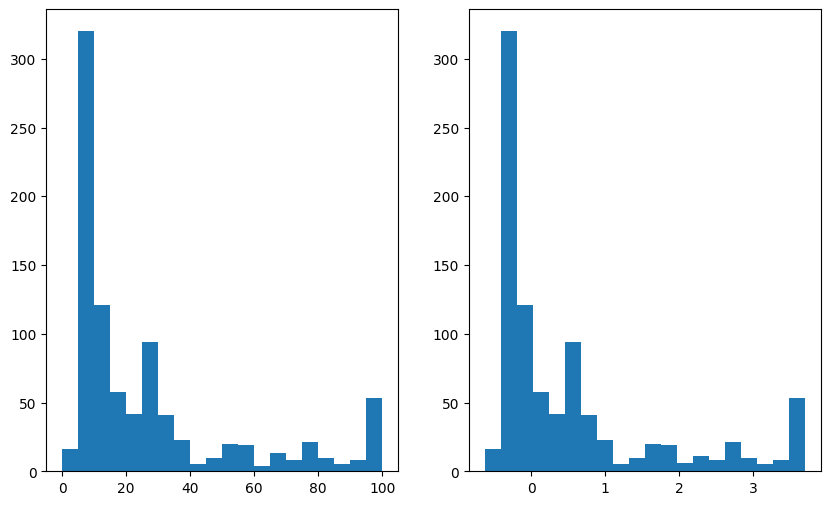

In [1982]:
# plt.hist(data['Fare'],bins=20)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Fare'],bins=20)
plt.subplot(1,2,2)
plt.hist(df_robust_scaler['Fare'],bins=20)
plt.show()

In [1983]:
import scipy.stats as stat
import matplotlib.pyplot as plt
#### function to check whether feature is normally distributed
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist() # histogram
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=plt)# prob plot
    plt.show()

Z-score

In [1984]:
from scipy import stats

# Chuẩn hóa dữ liệu bằng Z-score
z_scores = stats.zscore(data)

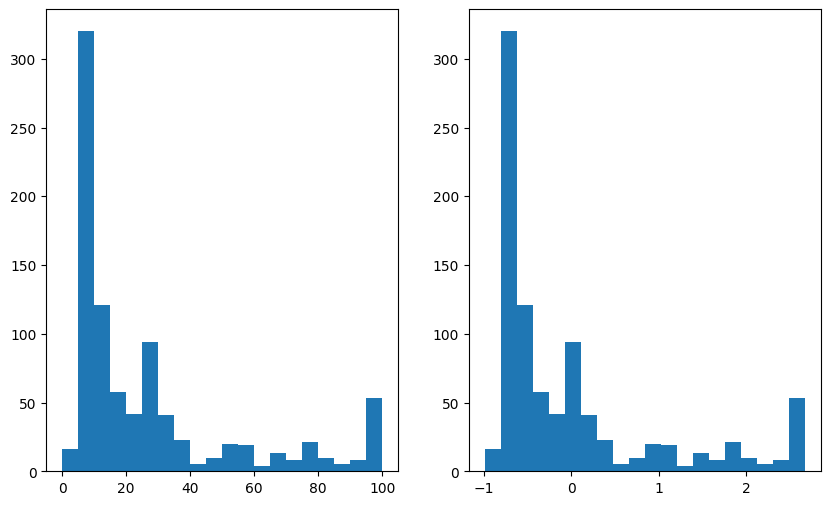

In [1985]:
import matplotlib.pyplot as plt
# plt.hist(z_scores['Fare'],bins=20)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Fare'],bins=20)
plt.subplot(1,2,2)
plt.hist(z_scores['Fare'],bins=20)
plt.show()



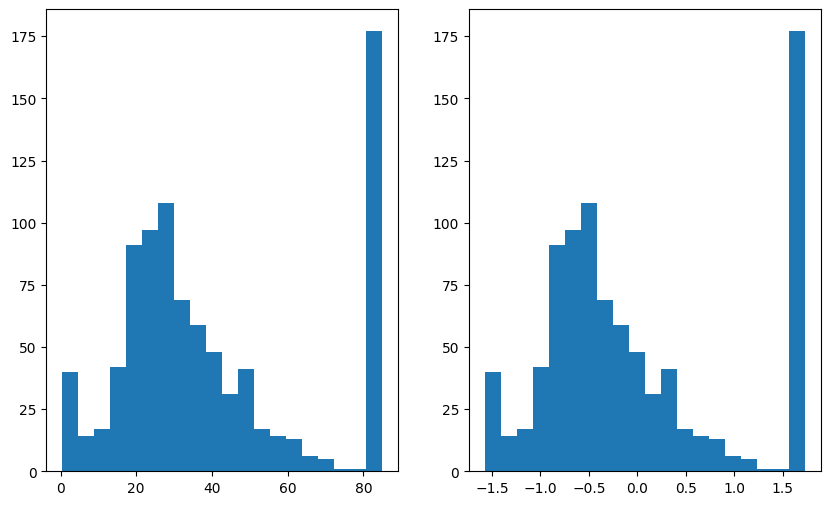

In [1986]:
# plt.hist(z_scores['Age_random2'],bins=20)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Age_random2'],bins=20)
plt.subplot(1,2,2)
plt.hist(z_scores['Age_random2'],bins=20)
plt.show()

Maxabs

In [1987]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(data),columns
=data.columns)

In [1988]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Fare         891 non-null    float64
 3   Age_random2  891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


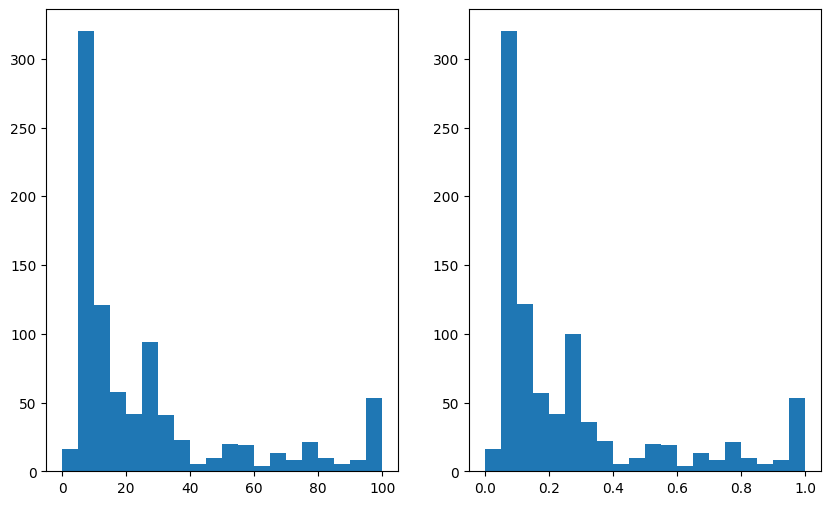

In [1989]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Fare'],bins=20)
plt.subplot(1,2,2)
plt.hist(scaled_data['Fare'],bins=20)
plt.show()

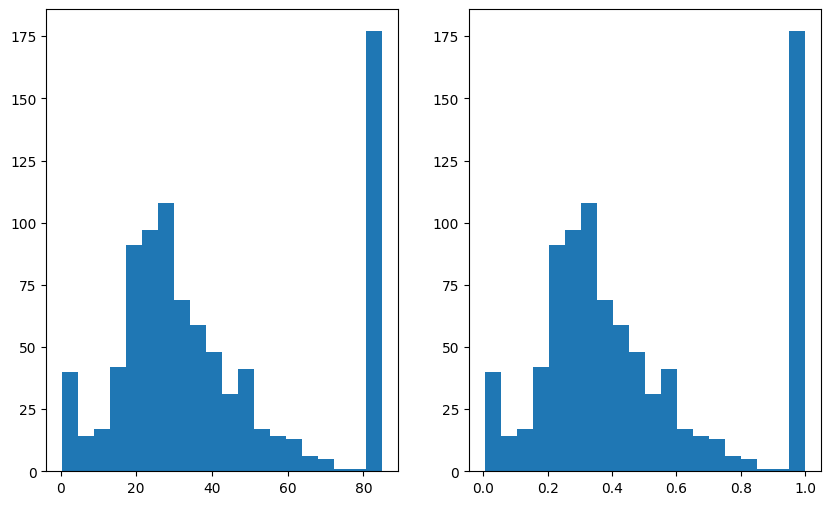

In [1990]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Age_random2'],bins=20) # histogram
plt.subplot(1,2,2)
plt.hist(scaled_data['Age_random2'],bins=20)
plt.show()

Normalize

In [1991]:
from sklearn.preprocessing import Normalizer


scaler = Normalizer()


normalized_data = pd.DataFrame(scaler.fit_transform(data),columns
=data.columns)

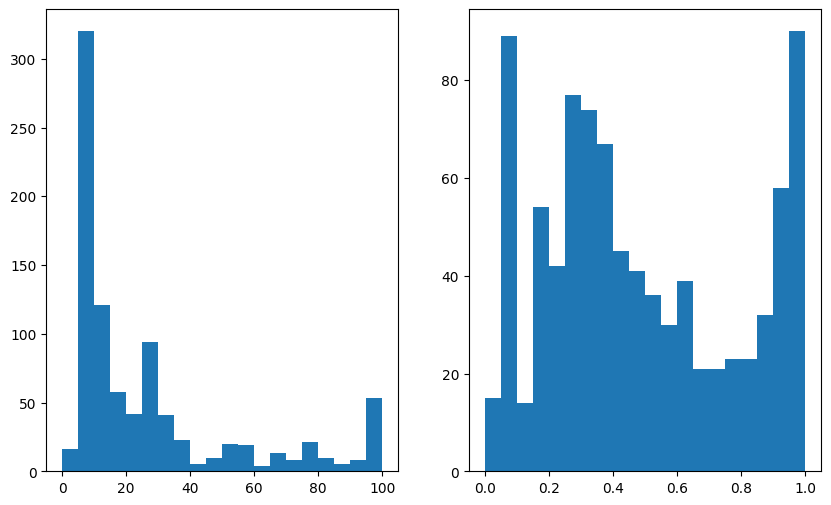

In [1992]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Fare'],bins=20)
plt.subplot(1,2,2)
plt.hist(normalized_data['Fare'],bins=20)
plt.show()

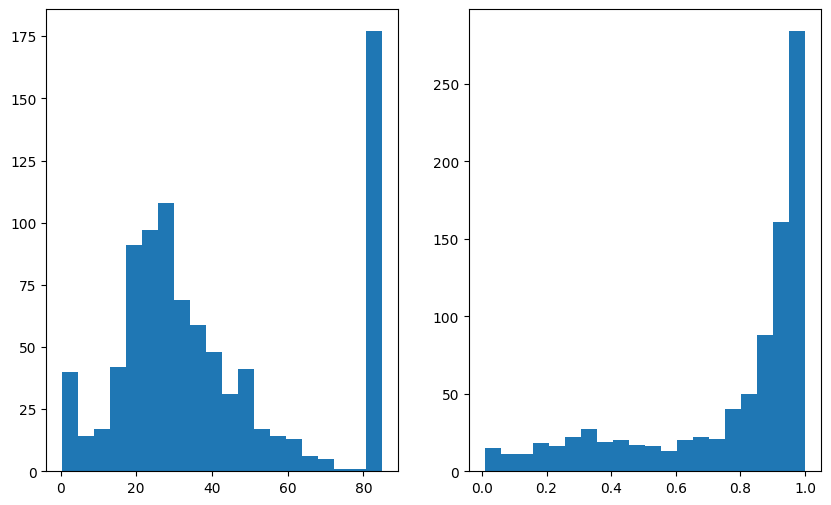

In [1993]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Age_random2'],bins=20)
plt.subplot(1,2,2)
plt.hist(normalized_data['Age_random2'],bins=20)
plt.show()

Quantile transformer

In [1994]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, output_distribution='normal')
Transformer_data = pd.DataFrame(scaler.fit_transform(data),columns
=data.columns)

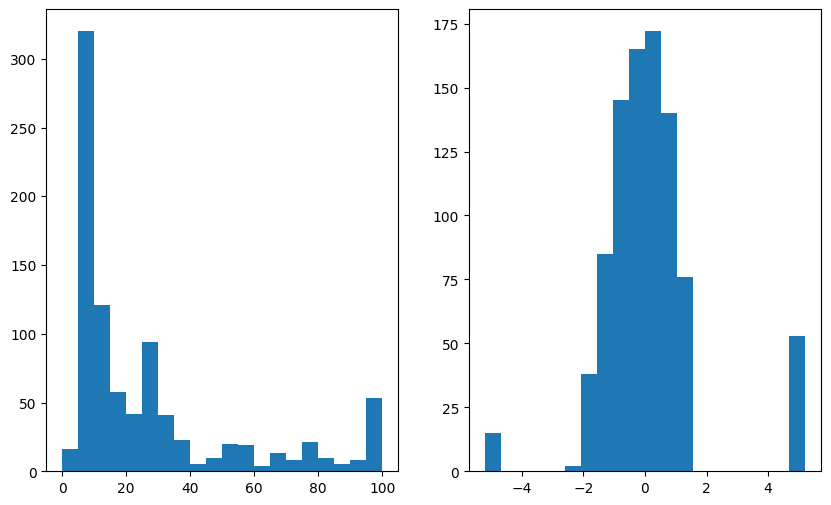

In [1995]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Fare'],bins=20)
plt.subplot(1,2,2)
plt.hist(Transformer_data['Fare'],bins=20)
plt.show()

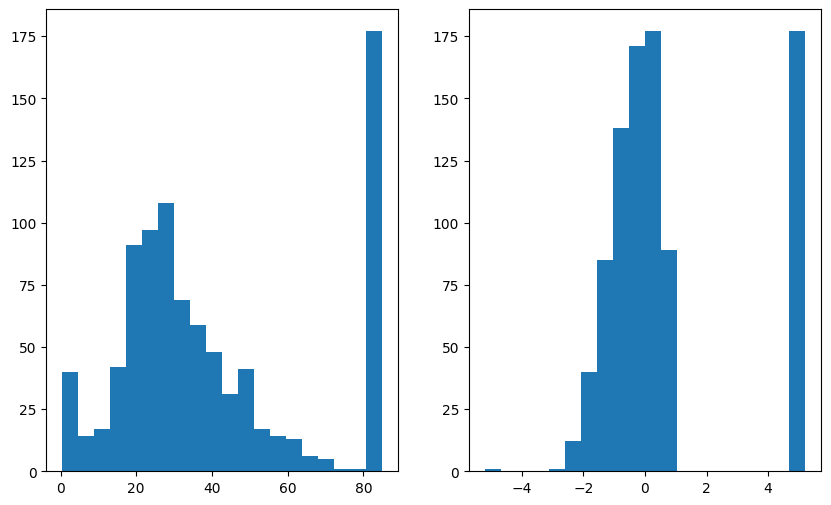

In [1996]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Age_random2'],bins=20)
plt.subplot(1,2,2)
plt.hist(Transformer_data['Age_random2'],bins=20)
plt.show()

PowerTransformer

In [1997]:

from sklearn.preprocessing import PowerTransformer


# Khởi tạo PowerTransformer 
pt = PowerTransformer(method='yeo-johnson')
Pted_data = pd.DataFrame(pt.fit_transform(data),columns
=data.columns)

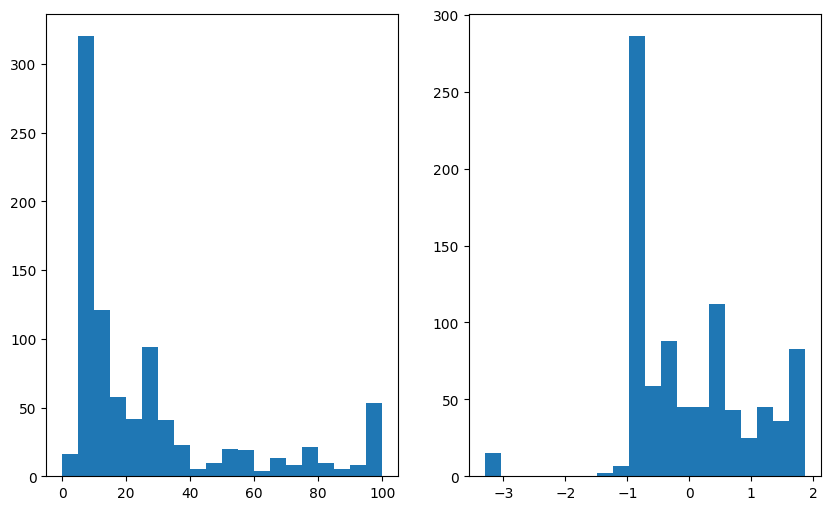

In [1998]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Fare'],bins=20)
plt.subplot(1,2,2)
plt.hist(Pted_data['Fare'],bins=20)
plt.show()

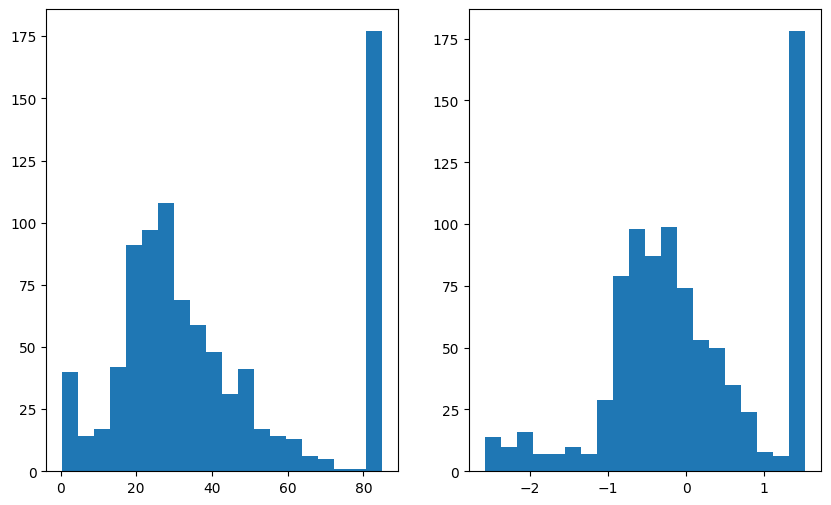

In [1999]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['Age_random2'],bins=20)
plt.subplot(1,2,2)
plt.hist(Pted_data['Age_random2'],bins=20)
plt.show()

Tong ket so do voi bien fare

Text(0.5, 1.0, 'PowerTransformed')

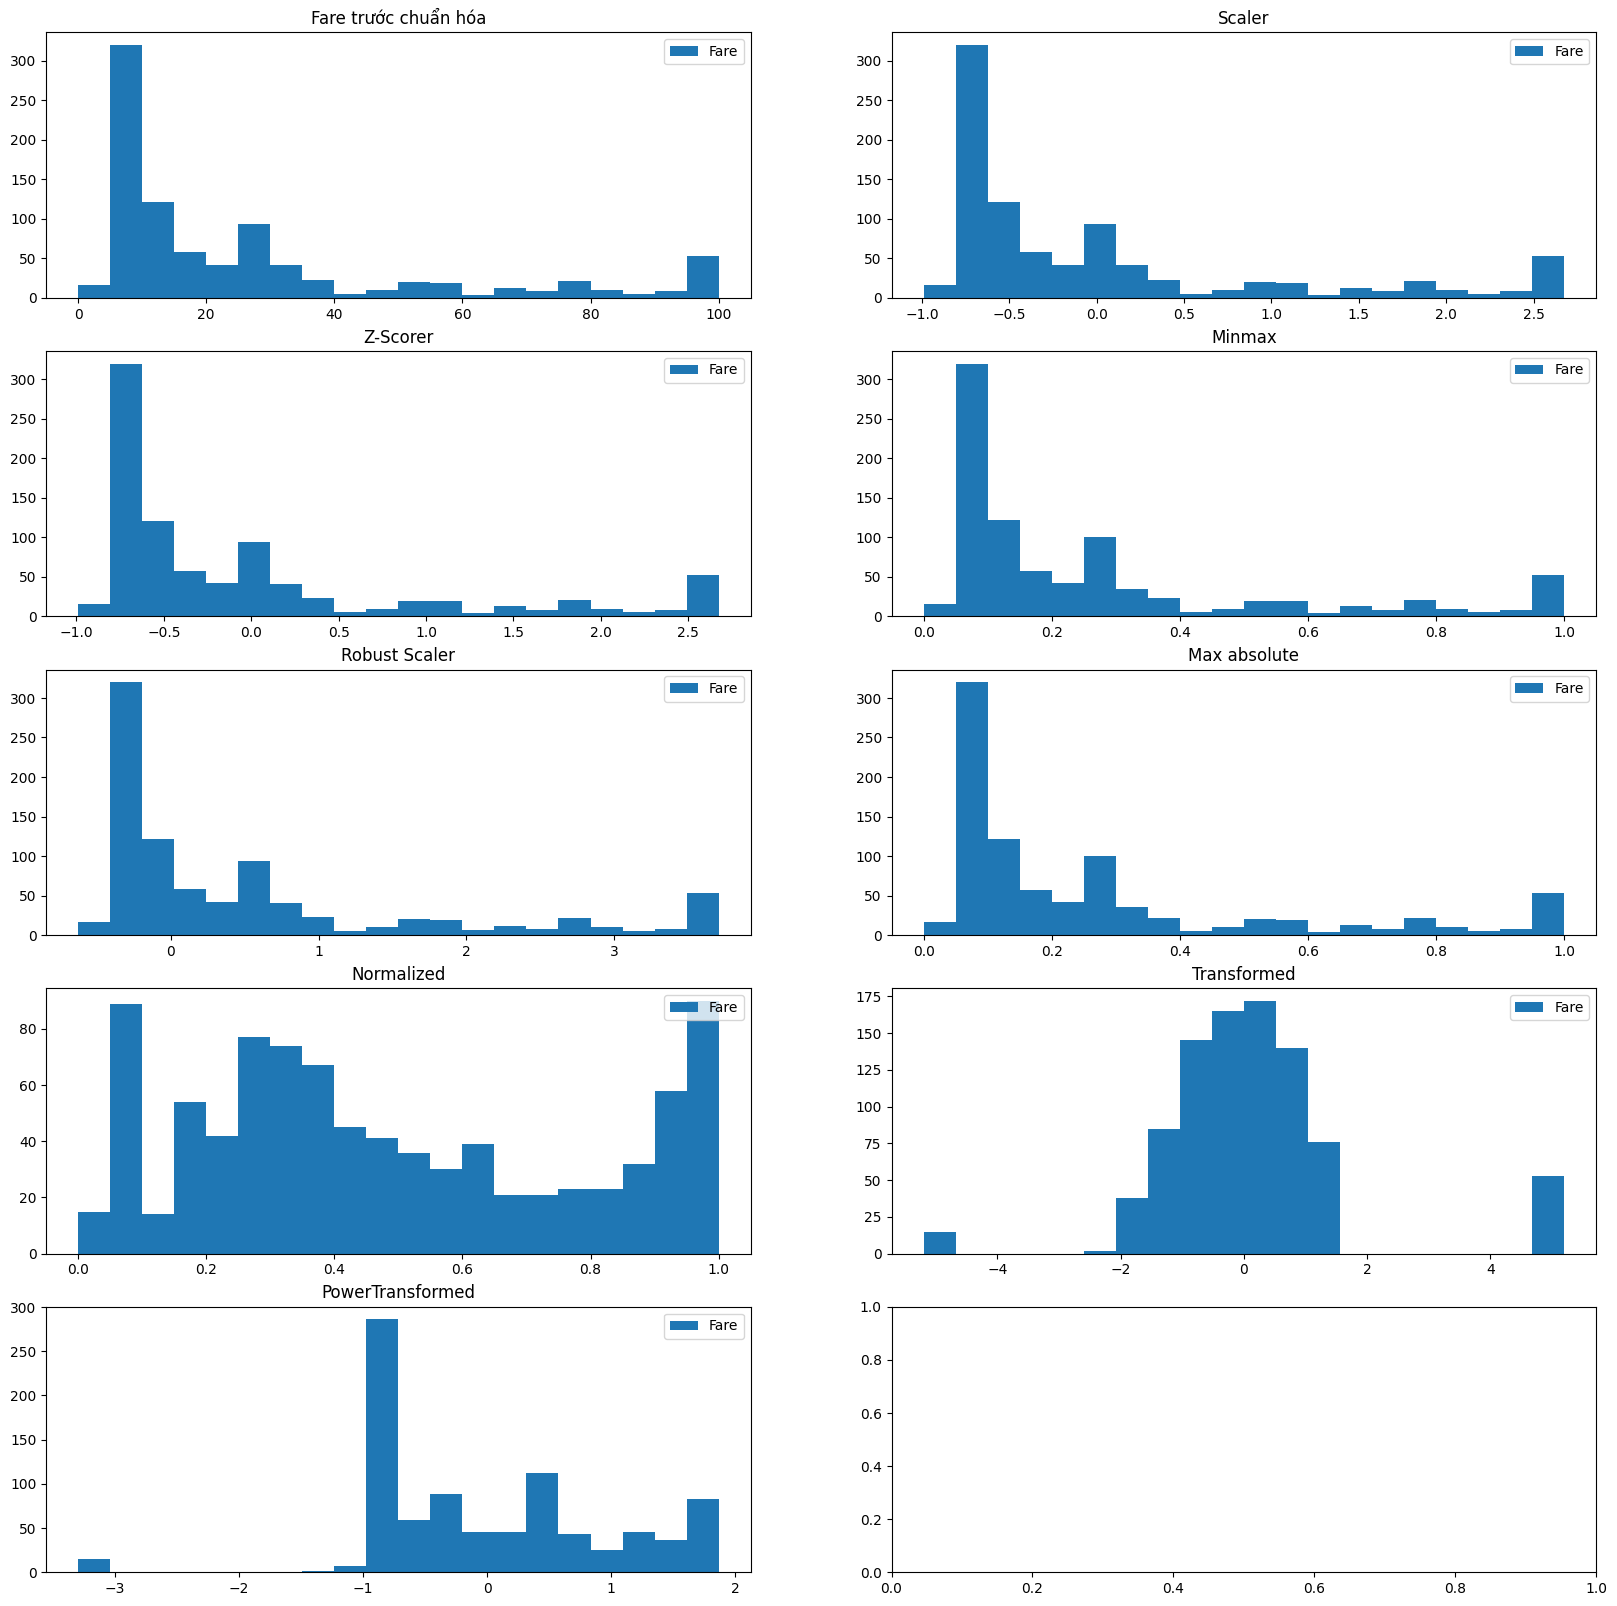

In [2000]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle("", fontsize = 20)
ax1.hist(data['Fare'], bins=20)
ax1.legend(['Fare'], loc='upper right')
ax1.set_title("Fare trước chuẩn hóa")

ax2.hist(df_scaled['Fare'], bins=20) 
ax2.legend(['Fare'], loc='upper right')
ax2.set_title("Scaler")

ax3.hist(z_scores['Fare'], bins=20)
ax3.legend(['Fare'], loc='upper right')
ax3.set_title("Z-Scorer")

ax4.hist(df_minmax['Fare'], bins=20 )
ax4.legend(['Fare'], loc='upper right')
ax4.set_title("Minmax")

ax5.hist(df_robust_scaler['Fare'], bins=20)
ax5.legend(['Fare'], loc='upper right')
ax5.set_title("Robust Scaler")

ax6.hist(scaled_data['Fare'], bins=20)
ax6.legend(['Fare'], loc='upper right')
ax6.set_title("Max absolute")

ax7.hist(normalized_data['Fare'], bins=20)
ax7.legend(['Fare'], loc='upper right')
ax7.set_title("Normalized")

ax8.hist(Transformer_data['Fare'], bins=20)
ax8.legend(['Fare'], loc='upper right')
ax8.set_title("Transformed")

ax9.hist(Pted_data['Fare'], bins=20)
ax9.legend(['Fare'], loc='upper right')
ax9.set_title("PowerTransformed")

bien AGE

Text(0.5, 1.0, 'PowerTransformed')

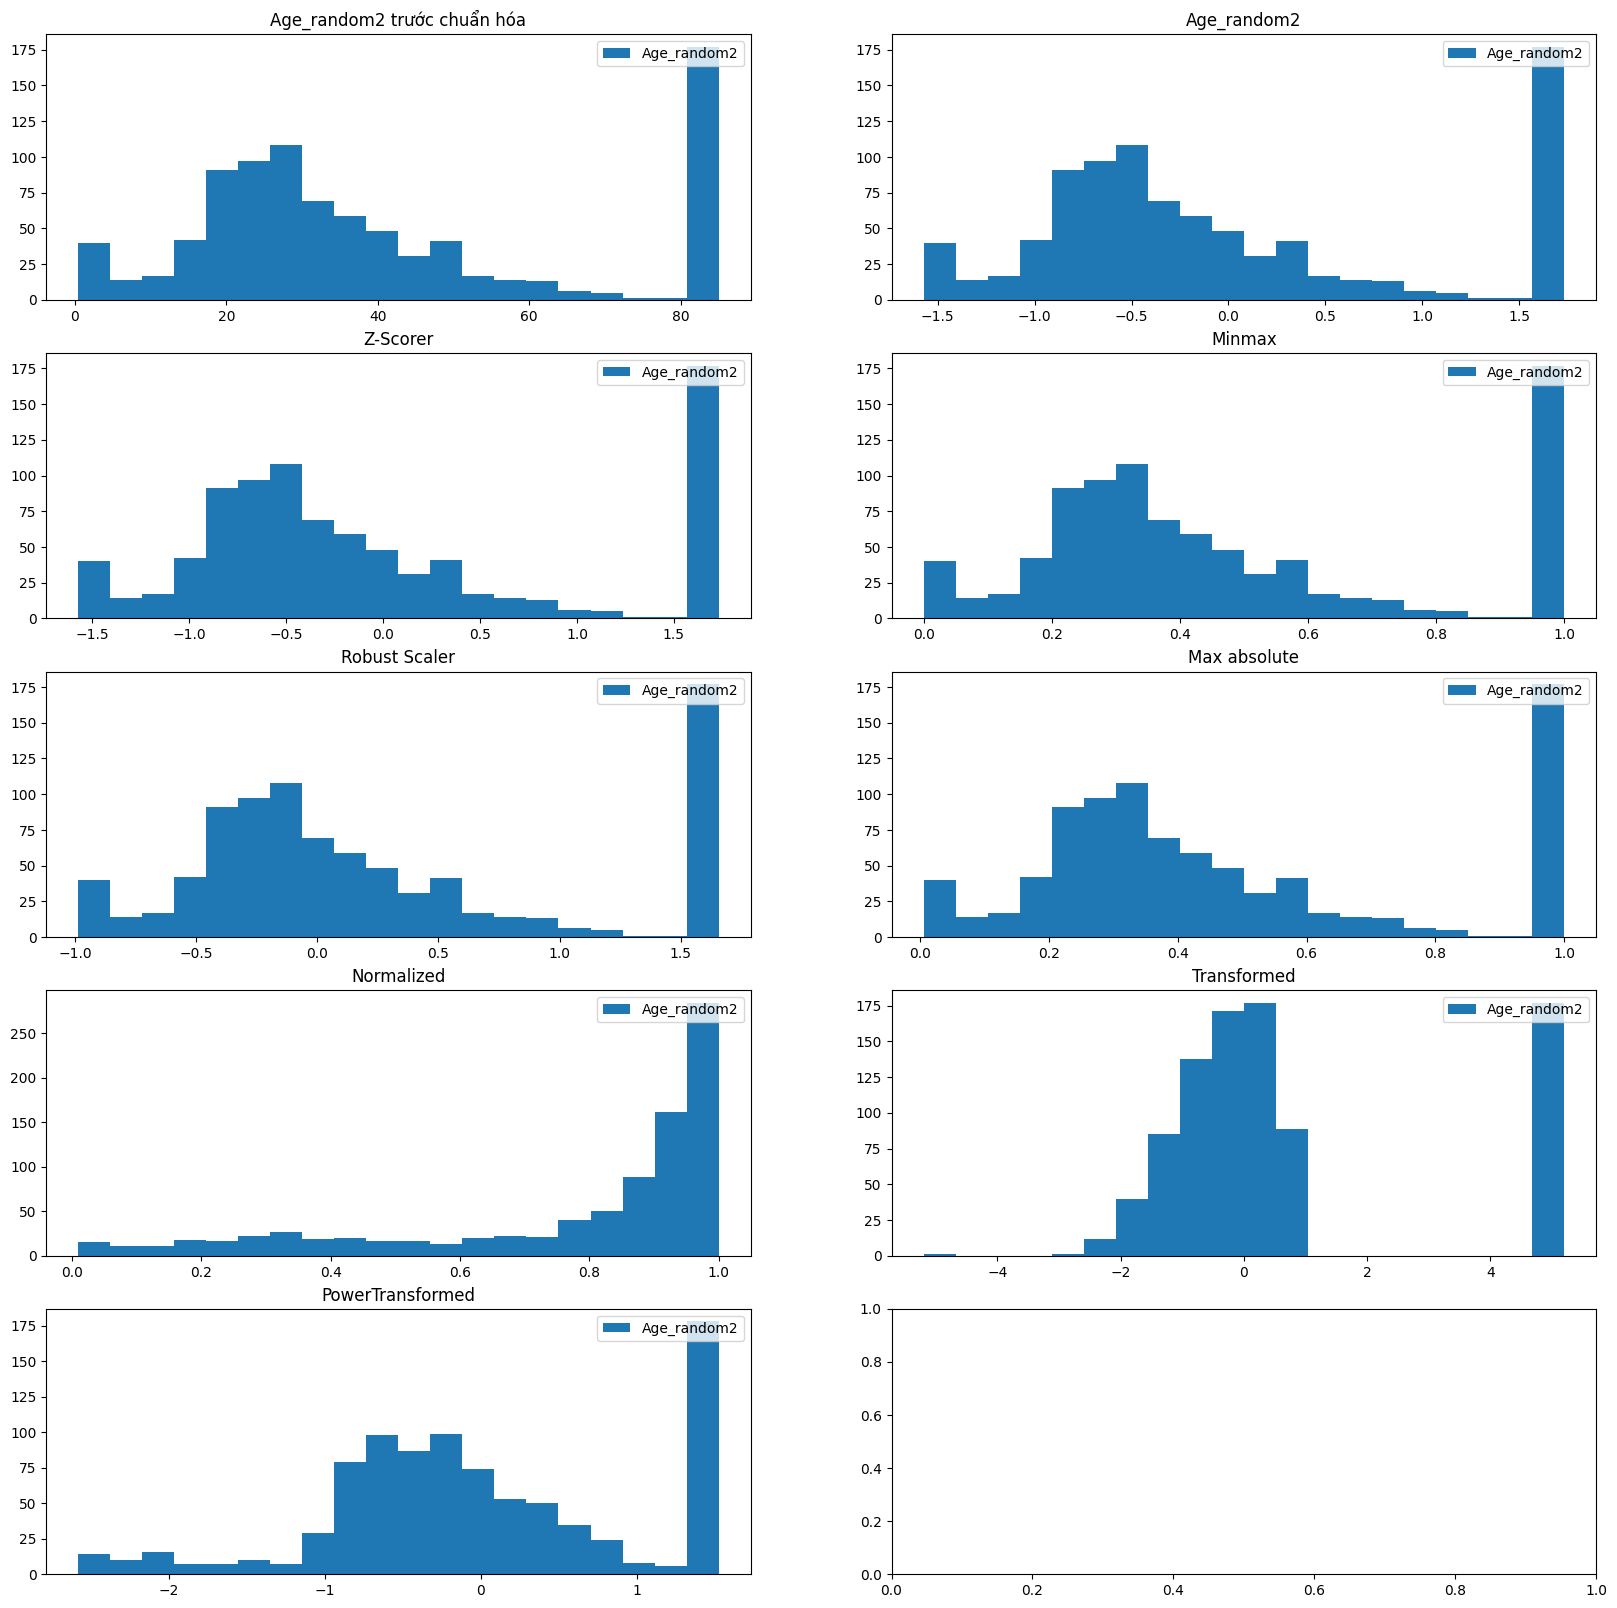

In [2001]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle("", fontsize = 20)
ax1.hist(data['Age_random2'], bins=20)
ax1.legend(['Age_random2'], loc='upper right')
ax1.set_title("Age_random2 trước chuẩn hóa")

ax2.hist(df_scaled['Age_random2'], bins=20) 
ax2.legend(['Age_random2'], loc='upper right')
ax2.set_title("Age_random2")

ax3.hist(z_scores['Age_random2'], bins=20)
ax3.legend(['Age_random2'], loc='upper right')
ax3.set_title("Z-Scorer")

ax4.hist(df_minmax['Age_random2'], bins=20 )
ax4.legend(['Age_random2'], loc='upper right')
ax4.set_title("Minmax")

ax5.hist(df_robust_scaler['Age_random2'], bins=20)
ax5.legend(['Age_random2'], loc='upper right')
ax5.set_title("Robust Scaler")

ax6.hist(scaled_data['Age_random2'], bins=20)
ax6.legend(['Age_random2'], loc='upper right')
ax6.set_title("Max absolute")

ax7.hist(normalized_data['Age_random2'], bins=20)
ax7.legend(['Age_random2'], loc='upper right')
ax7.set_title("Normalized")

ax8.hist(Transformer_data['Age_random2'], bins=20)
ax8.legend(['Age_random2'], loc='upper right')
ax8.set_title("Transformed")

ax9.hist(Pted_data['Age_random2'], bins=20)
ax9.legend(['Age_random2'], loc='upper right')
ax9.set_title("PowerTransformed")

Do chinh xac cua tung phuong phap

SCALER

In [2002]:
SCALER=[]

In [2003]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df_scaled[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    SCALER.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6455223880597015


SCOREZ

In [2004]:
SCOREZ=[]

In [2005]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(z_scores[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    SCOREZ.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6455223880597015


minmax

In [2006]:
MINMAX=[]

In [2007]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df_minmax[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MINMAX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.7014925373134329
Accuracy_score: 0.667910447761194
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6492537313432836


ROBUST

In [2008]:
ROBUST=[]

In [2009]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df_robust_scaler[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    ROBUST.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6417910447761194


MAXABS

In [2010]:
MAXABS=[]

In [2011]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(scaled_data[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MAXABS.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.7014925373134329
Accuracy_score: 0.667910447761194
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6492537313432836


Normal

In [2012]:
NORMAL=[]

In [2013]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(normalized_data[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    NORMAL.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.7089552238805971
Accuracy_score: 0.6455223880597015
Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.7089552238805971
Accuracy_score: 0.7313432835820896
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.7276119402985075
Accuracy_score: 0.6716417910447762


QUANTILE

In [2014]:
QUANTILE=[]

In [2015]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(Transformer_data[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    QUANTILE.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6529850746268657
Accuracy_score: 0.6455223880597015
Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6529850746268657
Accuracy_score: 0.6492537313432836


POWER

In [2016]:
POWER=[]

In [2017]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(Pted_data[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    POWER.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6343283582089553
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6380597014925373


BANG TONG KET

In [2018]:
dfAcc = pd.DataFrame ({
    'THUATTOAN': [ 
                        
                                 'SCOREZ', 
                                 'MINMAX', 
                                 'ROBUST', 
                                 'MAXABS',
                                 'NORMALIZE', 
                                 'QUANTILETRANSFORMER', 
                                 'POWERTRANSFORMER'], 
    'Accuracy':  [
                
                                 round(np.mean(SCOREZ),5), 
                                 round(np.mean(MINMAX),5), 
                                 round(np.mean(ROBUST),5), 
                                 round(np.mean(MAXABS),5), 
                                 round(np.mean(NORMAL),5), 
                                 round(np.mean(QUANTILE),5), 
                                 round(np.mean(POWER),5)],
    
    
})
dfAcc.index = [ '1','2','3','4','5','6','7']
print(dfAcc)

             THUATTOAN  Accuracy
1               SCOREZ   0.66604
2               MINMAX   0.66716
3               ROBUST   0.66567
4               MAXABS   0.66716
5            NORMALIZE   0.69179
6  QUANTILETRANSFORMER   0.65784
7     POWERTRANSFORMER   0.66903


In [2019]:
print(np.mean(RANDOM2_FIX))

0.666044776119403


In [2020]:
print(np.mean(NORMAL))

0.6917910447761193


DO CHENH LECH SAU KHI CHUAN HOA

In [2021]:
print(np.mean(NORMAL)-np.mean(RANDOM2_FIX))

0.025746268656716254


SO DO CHUAN HOA

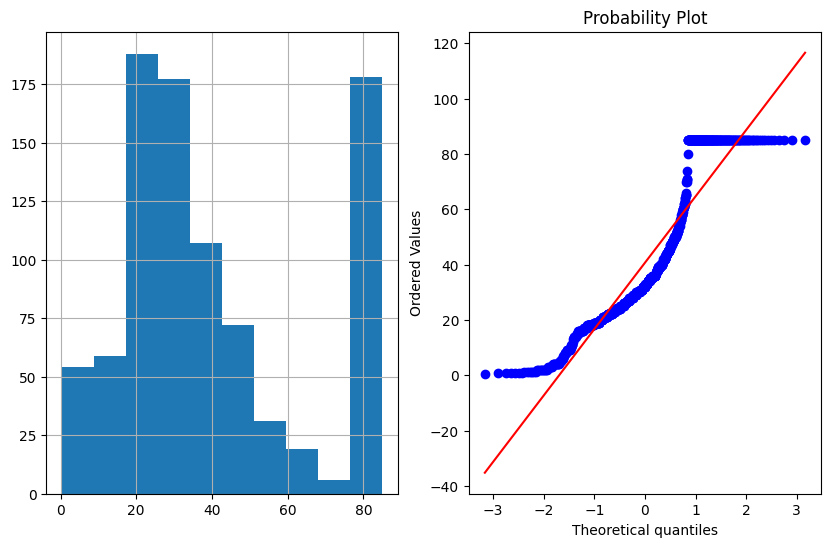

In [2022]:
plot_data(data,'Age_random2')

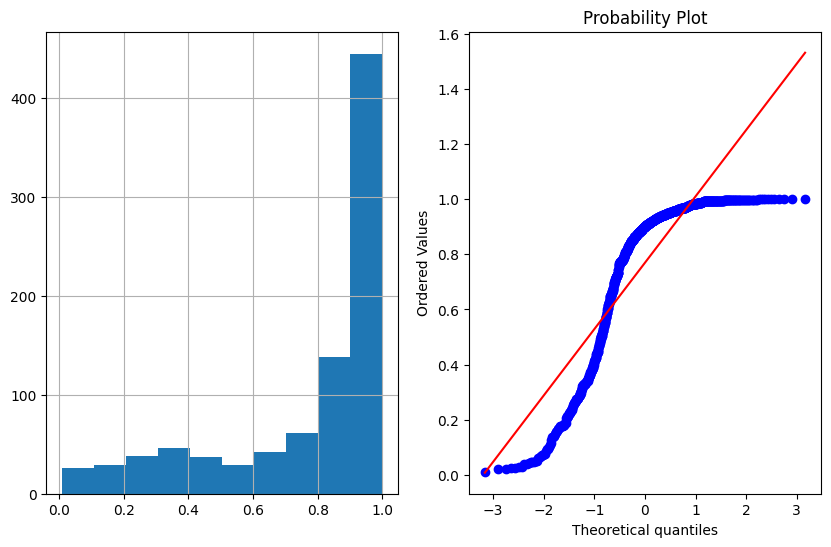

In [2023]:
plot_data(normalized_data,'Age_random2')

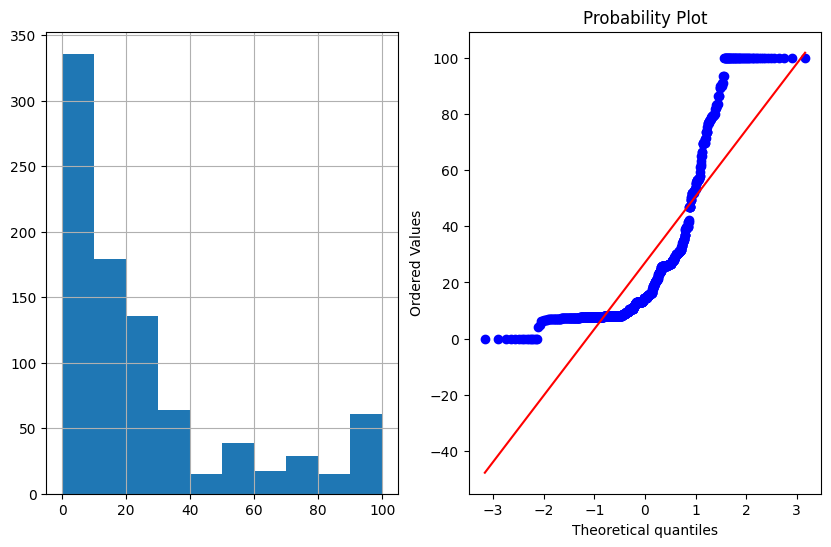

In [2024]:
plot_data(data,'Fare')

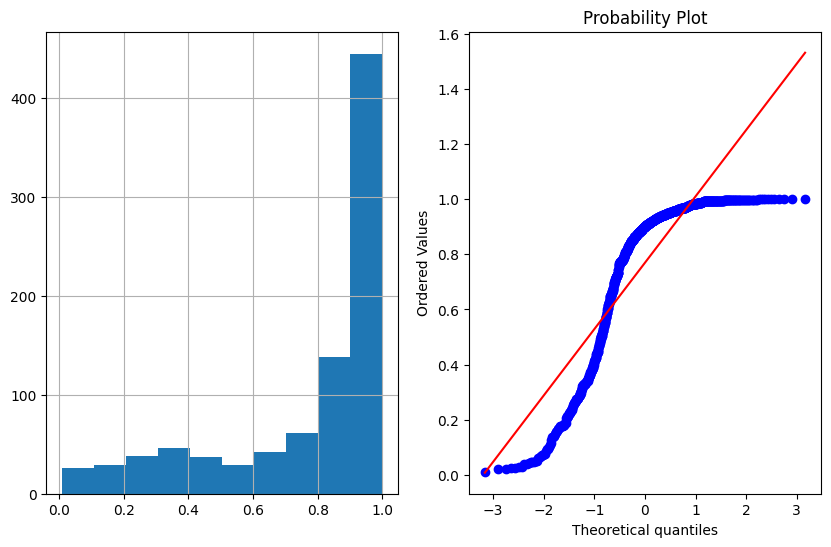

In [2025]:
plot_data(normalized_data,'Age_random2')

CROSS_VALIDATION

In [2026]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

Scaler_scorez

In [2027]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
SCOREZ_PIPELINE=[]

In [2028]:
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data[['Age_random2','Fare']],data['Survived'],test_size=0.3, random_state=i)
    # fit the whole pipeline
    pipe.fit(X_train, y_train)
    result = cross_validate(pipe, X_train, y_train, cv=5, scoring='accuracy')
    test_score=result['test_score']
    meanscore=np.mean(test_score)
    SCOREZ_PIPELINE.append(meanscore)

MINMAX

In [2029]:
pipe = make_pipeline(
    MinMaxScaler(),
    LogisticRegression()
)

MINMAX_PIPELINE=[]
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data[['Age_random2','Fare']],data['Survived'],test_size=0.3, random_state=i)
    # fit the whole pipeline
    pipe.fit(X_train, y_train)
    result = cross_validate(pipe, X_train, y_train, cv=5, scoring='accuracy')
    test_score=result['test_score']
    meanscore=np.mean(test_score)
    MINMAX_PIPELINE.append(meanscore)

ROBUST

In [2030]:
pipe = make_pipeline(
    RobustScaler(),
    LogisticRegression()
)

ROBUST_PIPELINE=[]
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data[['Age_random2','Fare']],data['Survived'],test_size=0.3, random_state=i)
    # fit the whole pipeline
    pipe.fit(X_train, y_train)
    result = cross_validate(pipe, X_train, y_train, cv=5, scoring='accuracy')
    test_score=result['test_score']
    meanscore=np.mean(test_score)
    ROBUST_PIPELINE.append(meanscore)

MAXABS

In [2031]:
pipe = make_pipeline(
    MaxAbsScaler(),
    LogisticRegression()
)

MAXABS_PIPELINE=[]
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data[['Age_random2','Fare']],data['Survived'],test_size=0.3, random_state=i)
    # fit the whole pipeline
    pipe.fit(X_train, y_train)
    result = cross_validate(pipe, X_train, y_train, cv=5, scoring='accuracy')
    test_score=result['test_score']
    meanscore=np.mean(test_score)
    MAXABS_PIPELINE.append(meanscore)

NORMAL

In [2032]:
pipe = make_pipeline(
    Normalizer(),
    LogisticRegression()
)

NORMAL_PIPELINE=[]
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data[['Age_random2','Fare']],data['Survived'],test_size=0.3, random_state=i)
    # fit the whole pipeline
    pipe.fit(X_train, y_train)
    result = cross_validate(pipe, X_train, y_train, cv=5, scoring='accuracy')
    test_score=result['test_score']
    meanscore=np.mean(test_score)
    NORMAL_PIPELINE.append(meanscore)

QUANTILE

In [2033]:
pipe = make_pipeline(
    QuantileTransformer(),
    LogisticRegression()
)

QUANTILE_PIPELINE=[]
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data[['Age_random2','Fare']],data['Survived'],test_size=0.3, random_state=i)
    # fit the whole pipeline
    pipe.fit(X_train, y_train)
    result = cross_validate(pipe, X_train, y_train, cv=5, scoring='accuracy')
    test_score=result['test_score']
    meanscore=np.mean(test_score)
    QUANTILE_PIPELINE.append(meanscore)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (623). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (498). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (498). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qb

In [2034]:
print(QUANTILE_PIPELINE)

[0.6661548387096774, 0.6966193548387096, 0.6597677419354839, 0.6837161290322581, 0.6725935483870968, 0.6710193548387097, 0.6533548387096774, 0.677341935483871, 0.6579741935483872, 0.6787870967741936]


POWERTRANSFORMER

In [2035]:
pipe = make_pipeline(
    PowerTransformer(),
    LogisticRegression()
)

POWER_PIPELINE=[]
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data[['Age_random2','Fare']],data['Survived'],test_size=0.3, random_state=i)
    # fit the whole pipeline
    pipe.fit(X_train, y_train)
    result = cross_validate(pipe, X_train, y_train, cv=5, scoring='accuracy')
    test_score=result['test_score']
    meanscore=np.mean(test_score)
    POWER_PIPELINE.append(meanscore)

SO SANH BAI 5 VA BAI 8 ( 2 ki thuat danh gia)

In [2036]:
dfSS = pd.DataFrame ({
    'THUATTOAN': [ 
                        
                                 'SCOREZ', 
                                 'MINMAX', 
                                 'ROBUST', 
                                 'MAXABS',
                                 'NORMALIZE', 
                                 'QUANTILETRANSFORMER', 
                                 'POWERTRANSFORMER'], 
    'Accuracy (accuracy_score)':  [
                
                                 round(np.mean(SCOREZ),5), 
                                 round(np.mean(MINMAX),5), 
                                 round(np.mean(ROBUST),5), 
                                 round(np.mean(MAXABS),5), 
                                 round(np.mean(NORMAL),5), 
                                 round(np.mean(QUANTILE),5), 
                                 round(np.mean(POWER),5)],
    'Accuracy (cross_validate)':  [
                
                                 round(np.mean(SCOREZ_PIPELINE),5), 
                                 round(np.mean(MINMAX_PIPELINE),5), 
                                 round(np.mean(ROBUST_PIPELINE),5), 
                                 round(np.mean(MAXABS_PIPELINE),5), 
                                 round(np.mean(NORMAL_PIPELINE),5), 
                                 round(np.mean(QUANTILE_PIPELINE),5), 
                                 round(np.mean(POWER_PIPELINE),5)],
    
    
})
dfSS.index = [ '1','2','3','4','5','6','7']
print(dfSS)

             THUATTOAN  Accuracy (accuracy_score)  Accuracy (cross_validate)
1               SCOREZ                    0.66604                    0.67592
2               MINMAX                    0.66716                    0.67864
3               ROBUST                    0.66567                    0.67608
4               MAXABS                    0.66716                    0.67864
5            NORMALIZE                    0.69179                    0.69358
6  QUANTILETRANSFORMER                    0.65784                    0.67173
7     POWERTRANSFORMER                    0.66903                    0.67237


In [2037]:
print(np.mean(NORMAL_PIPELINE))

0.6935793548387096


DO LECH SAU KHI SU DUNG CROSS_VALIDATION

In [2038]:
print(np.mean(NORMAL_PIPELINE)-np.mean(NORMAL))

0.0017883100625902815


random gia tri normalize cross-valdate 

BAI 2

Chia bo du lieu thanh Training set va TEST set dung ki thuat Hold-out with Stratified sampling(7:3)

In [2039]:
X_train, X_test, y_train, y_test = train_test_split(data[['Age_random2','Fare']],data['Survived'],test_size=0.3,stratify=data['Survived'], random_state=0)

Xay dung va danh gia mo hinh 

In [2040]:
pipe = make_pipeline(
    Normalizer(),
    LogisticRegression()
)

In [2041]:
parameterr = {
    'logisticregression__penalty': ['l1','l2', 'none'],
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [2042]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe, parameterr, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalizer', Normalizer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__penalty': ['l1', 'l2', 'none']},
             scoring='accuracy')

In [2043]:
print(grid_search.best_params_)
acc_train=grid_search.best_score_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}


Bo tham so penalty: l2 , C : 1

HUAN LUYEN MO HINH TREN TAP TRAIN

In [2044]:

# Tạo pipeline với Normalizer và LogisticRegression với các siêu tham số tối ưu
pipe = make_pipeline(
    Normalizer(),
    LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000)
)

# Huấn luyện mô hình trên tập huấn luyện
pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])

TINH TOAN DO CHINH XAC

In [2045]:
accuracy = pipe.score(X_test, y_test)
print('Accuracy on test set:', accuracy)


Accuracy on test set: 0.6977611940298507


In [2046]:
print("ACCURACY ON TRAIN:",acc_train )
print("ACCURACY ON TEST:",accuracy)

ACCURACY ON TRAIN: 0.6982967741935484
ACCURACY ON TEST: 0.6977611940298507


DO LECH SO VOI LUC CHUAN HOA + CROSS_VALIDATION

In [2047]:
print(accuracy-np.mean(NORMAL_PIPELINE))

0.0041818391911411235


Su Dung vong lap va ham cross_validate

In [2048]:
penalty_list = ['l1', 'l2', 'none']
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
best_score = 0
best_params = {}

for penalty in penalty_list:
    for C in C_list:
        clf = make_pipeline(Normalizer(), LogisticRegression(penalty=penalty, C=C, solver='saga', random_state=42))
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring='accuracy')
        avg_score = scores['test_score'].mean()
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'logisticregression__penalty': penalty, 'logisticregression__C': C}



C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.

In [2049]:
print('Best parameters:', best_params)
print('Best score:', best_score)

Best parameters: {'logisticregression__penalty': 'l2', 'logisticregression__C': 1}
Best score: 0.6982967741935484


In [2050]:

# Tạo pipeline với Normalizer và LogisticRegression với các siêu tham số tối ưu
pipe = make_pipeline(
    Normalizer(),
    LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=1000)
)

# Huấn luyện mô hình trên tập huấn luyện
pipe.fit(X_train, y_train)

#Tinh toan do chinh xac
accuracy2 = pipe.score(X_test, y_test)
print("ACCURACY ON TRAIN:",grid_search.best_score_ )
print("ACCURACY ON TEST:",accuracy2)

ACCURACY ON TRAIN: 0.6982967741935484
ACCURACY ON TEST: 0.6977611940298507
